#Boosting Techniques | Assignment


###Q.1:What is Boosting in Machine Learning? Explain how it improves weak learners.

Answer:

- **Boosting** is an ensemble technique that combines multiple weak learners (often shallow decision trees) into a single strong model.

- Each new learner is trained sequentially, focusing more on the errors (misclassified samples) made by the previous learners.

- **Improvement process:**

   - Assigns higher weights to misclassified points.

  - Each model corrects its predecessor’s mistakes.

  - Final prediction is based on weighted majority vote (classification) or weighted sum (regression).

- This reduces bias and often achieves higher accuracy than bagging methods.

###Q.2:What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Answer:

- **AdaBoost (Adaptive Boosting):**

  - Adjusts sample weights after each round.

  - Misclassified samples get higher weights → next model focuses on them.

  - Combines weak learners by assigning higher weights to more accurate models.

- **Gradient Boosting:**

  - Models are trained sequentially to minimize a loss function (e.g., log-loss, MSE).

  - Each new tree is fitted on the residual errors (gradients) of the previous ensemble.

  - Uses gradient descent to optimize predictions.

**Key difference:** AdaBoost reweights data points, while Gradient Boosting fits on residual errors using gradients.


###Q.3:How does regularization help in XGBoost?

Answer:

- XGBoost includes L1 (Lasso) and L2 (Ridge) regularization in its objective function.

- **Benefits:**

  - Prevents overfitting by penalizing overly complex trees.

  - Encourages sparsity in features (L1).

  - Improves generalization on unseen data.

  - Provides stability for high-dimensional datasets.

- This makes XGBoost more robust compared to traditional Gradient Boosting.

###Q.4:Why is CatBoost considered efficient for handling categorical data?

Answer:

- CatBoost has built-in support for categorical features → no need for manual one-hot encoding.

- It uses Ordered Target Statistics (based on target variable distribution) instead of simple encoding.

- Prevents target leakage with a permutation-driven approach.

- Works efficiently even with high-cardinality categorical variables (e.g., zip codes, product IDs).

- Thus, CatBoost is particularly powerful for datasets with many categorical variables.

###Q.5:What are some real-world applications where boosting techniques are preferred over bagging methods?

Answer:

- Credit Scoring & Loan Default Prediction → Boosting handles imbalanced data better.

- Fraud Detection → Sequential training captures subtle fraud patterns.

- Healthcare (disease prediction) → High accuracy is crucial, boosting reduces bias.

- E-commerce Recommendation Systems → Handles categorical + numerical features well.

- Click-through Rate (CTR) Prediction in Ads → Boosting models like XGBoost/LightGBM dominate competitions (e.g., Kaggle).

###Q.6: Write a Python program to:
###● Train an AdaBoost Classifier on the Breast Cancer dataset.
###● Print the model accuracy.

Answer:


In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Evaluate
y_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))


AdaBoost Accuracy: 0.9707602339181286


###Q.7: Write a Python program to:
###● Train a Gradient Boosting Regressor on the California Housing dataset.
###● Evaluate performance using R-squared score.

Answer:

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gbr.fit(X_train, y_train)

# Evaluate
y_pred = gbr.predict(X_test)
print("R-squared Score:", r2_score(y_test, y_pred))


R-squared Score: 0.8235291005094919


###Question 8: Write a Python program to:
###● Train an XGBoost Classifier on the Breast Cancer dataset.
###● Tune the learning rate using GridSearchCV.
###● Print the best parameters and accuracy.

Answer.

In [12]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Parameter grid
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}

# Grid search
grid = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)



Best Parameters: {'learning_rate': 0.05}
Best Accuracy: 0.9572605756816284


###Question 9: Write a Python program to:
###● Train a CatBoost Classifier.
###● Plot the confusion matrix using seaborn.

Answer.

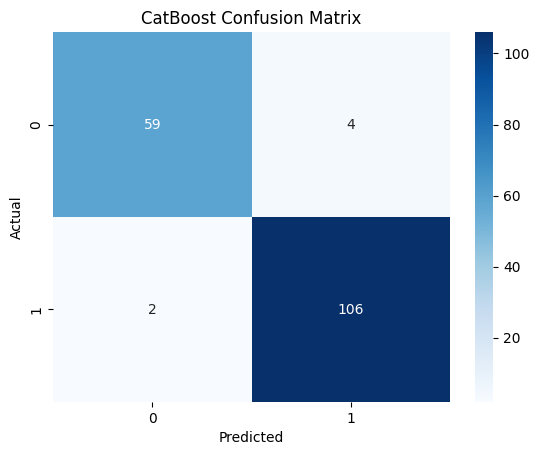

In [15]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train CatBoost
cat = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
cat.fit(X_train, y_train)

# Predictions
y_pred = cat.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Confusion Matrix")
plt.show()


###Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features.
###Describe your step-by-step data science pipeline using boosting techniques:
###● Data preprocessing & handling missing/categorical values.
###● Choice between AdaBoost, XGBoost, or CatBoost.
###● Hyperparameter tuning strategy.
###● Evaluation metrics you'd choose and why.
###● How the business would benefit from your model.

Answer.

**Step-by-step Pipeline:**

**1.Data Preprocessing:**

- Handle missing values → mean/median for numeric, most frequent/“unknown” for categorical.

- Encode categorical features → CatBoost can handle directly, else use target encoding/one-hot.

- Scale numeric values if needed.

- Address class imbalance → SMOTE, class weights, or balanced boosting.

**2.Choice of Algorithm:**

- CatBoost is preferred (handles categorical + missing values well).

- Alternatively, XGBoost with careful preprocessing.

**3.Hyperparameter Tuning:**

- GridSearchCV / RandomizedSearchCV on parameters like learning_rate, max_depth, n_estimators.

- Use early stopping to prevent overfitting.

**4.Evaluation Metrics:**

- Accuracy is not sufficient (data is imbalanced).

- Use Precision, Recall, F1-score, AUC-ROC.

- AUC-ROC helps measure ability to distinguish defaults from non-defaults.

**5.Business Benefit:**

Better risk assessment → fewer loan defaults.

Improved profitability by targeting reliable customers.

More trust in automated credit scoring systems.